**Background**

E-commerce companies like AMazon , flipkart uses different recommendation systems to provide suggestions to the customers.Amazon uses currently item-item collaborative filtering, which scales to massive datasets and produces high quality recommendation system in the real time. This system is a kind of a information filtering system which seeks to predict the "rating" or preferences which user is interested in.


**Introduction to Recommendation systems**


A recommendation engine is a system or algorithm that analyzes user data and provides personalized suggestions or recommendations for items or content that the user may be interested in. These recommendations are based on various factors such as the user's preferences, historical behavior, demographic information, and similarities to other users.

Recommendation engines are commonly used in e-commerce, OTT plateforms , social media, and other online services to enhance user experience and engagement. They help users discover new products, movies, music, articles, or any other items that align with their interests.

Recommeder system creates a similarity between the user and items and exploits the similarity between user/item to make recommendations.

**What recommeder system can solve ?**

1.  It can help the user to find the right product.
2.  It can increase the user engagement. For example, there's 40% more click on the google news due to recommendation.
3.  It helps the item providers to deliver the items to the right user.In Amazon , 35 % products get sold due to recommendation.
4.  It helps to make the contents more personalized.In Netflix most of the rented movies are from recommendations.

**Types of recommendations**

There are mainly 6 types of the recommendations systems :-

1.  Popularity based systems :- It works by recommeding items viewed and purchased by most people and are rated high.It is not a personalized recommendation.
2.  Classification model based:- It works by understanding the features of the user and applying the classification algorithm to decide whether the user is interested or not in the product.
3. Content based recommedations:- It is based on the information on the contents of the item rather than on the user opinions.The main idea is if the user likes an item then he or she will like the "other" similar item.
4. Collaborative Filtering:- It is based on assumption that people like things similar to other things they like, and things that are liked by other people with similar taste. it is mainly of two types: a) User-User b) Item -Item

5. Hybrid Approaches:- This system approach is to combine collaborative filtering, content-based filtering, and other approaches .

6. Association rule mining :- Association rules capture the relationships between items based on their patterns of co-occurrence across transactions


**Attribute Information:**

● userId : Every user identified with a unique id

● productId : Every product identified with a unique id

● Rating : Rating of the corresponding product by the corresponding user

● timestamp : Time of the rating 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [2]:
# user-defined function to check library is installed or not, if not installed then it will install automatically at runtime.
def check_and_install_library(library_name):
    try:
        importlib.import_module(library_name)
        print(f"{library_name} is already installed.")
    except ImportError:
        print(f"{library_name} is not installed. Installing...")
        try:
            import pip
            pip.main(['install', library_name])
        except:
            print("Error: Failed to install the library. Please install it manually.")

The Amazon product review dataset is huge, size of the dataset is 320 MB 

In [5]:
#load the dataframe and set column name
df=pd.read_csv('ratings_Electronics.csv',names=['userId', 'productId','rating','timestamp'])

In [6]:
df.shape

(7824482, 4)

In [7]:
df.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

Since our dataset is too big and it will be difficult to analyze the entire dataset due to limited resources,thats'why I am randomly taking 20% of the data as sample out of the whole dataset which is 1564896.

In [ ]:
#electronics_data=df.sample(n=1564896,ignore_index=True)

In [ ]:
#after taking samples drop df to release the memory occupied by entire dataframe
#del df

In [8]:
#print top 5 records of the dataset
electronics_data = df.copy()
electronics_data.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [9]:
#print the concise information of the dataset
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [10]:
#drop timestamp column
electronics_data.drop('timestamp',axis=1,inplace=True)

In [11]:
electronics_data.describe()

,rating
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


As we can see minimum rating of the products is 1 , maximum rating is 5 and average rating of the products is around 4.

In [12]:
#handle missing values
electronics_data.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

In [13]:
#handling duplicate records
electronics_data[electronics_data.duplicated()].shape[0]

0

In [14]:
electronics_data.head()

,userId,productId,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


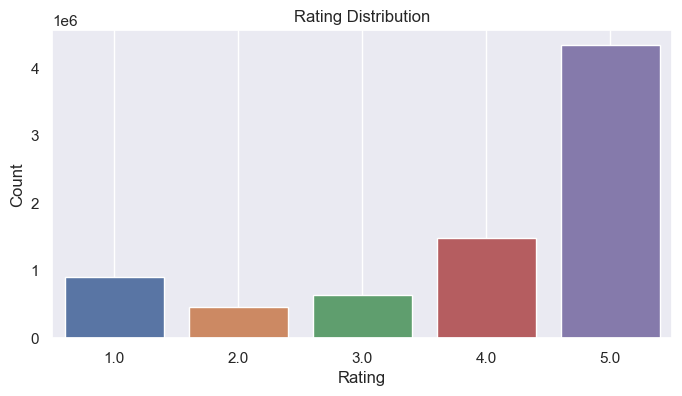

In [15]:
plt.figure(figsize=(8,4))
sns.countplot(x='rating',data=electronics_data)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

most of the user have given 5 rating

In [16]:
print('Total rating : ',electronics_data.shape[0])
print('Total unique users : ',electronics_data['userId'].unique().shape[0])
print('Total unique products : ',electronics_data['productId'].unique().shape[0])

Total rating :  7824482
Total unique users :  4201696
Total unique products :  476002


analyzing the rating by user

In [17]:
electronics_data.groupby(by='userId')['rating'].count().sort_values(ascending=False).head()

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: rating, dtype: int64

In [18]:
no_of_rated_products_per_user = electronics_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: rating, dtype: int64

In [19]:
print('No of rated product more than 50 per user : {} '.format(sum(no_of_rated_products_per_user >= 50)))

No of rated product more than 50 per user : 1540 


**Popularity Based Recommendation**

Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

The problems with popularity based recommendation system is that the personalization is not available with this method i.e. even though you know the behaviour of the user but you cannot recommend items accordingly.

In [20]:
data=electronics_data.groupby('productId').filter(lambda x:x['rating'].count()>=50)

In [21]:
data.head()

,userId,productId,rating
183,A1BKC6B7YHYTVV,0972683275,4.0
184,AWVFSIB42LHKJ,0972683275,4.0
185,A36MQBNADRH8YY,0972683275,5.0
186,A3SRXMPLAEZ6DP,0972683275,4.0
187,A20XXTXWF2TCPY,0972683275,5.0


In [22]:
no_of_rating_per_product=data.groupby('productId')['rating'].count().sort_values(ascending=False)

In [23]:
no_of_rating_per_product.head()

productId
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
Name: rating, dtype: int64

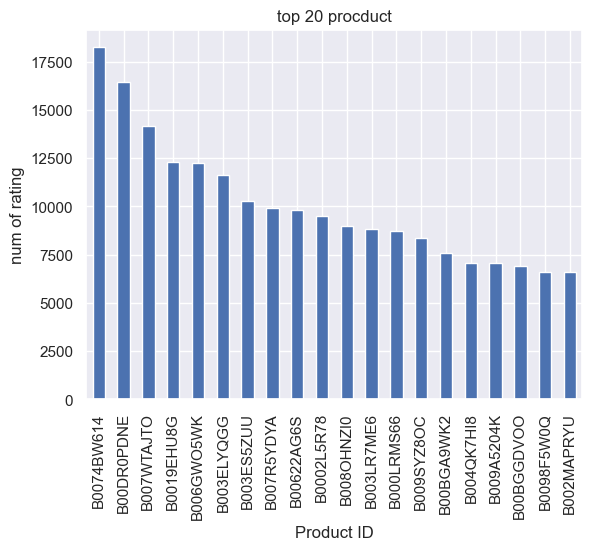

In [24]:
#top 20 product
no_of_rating_per_product.head(20).plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('num of rating')
plt.title('top 20 procduct')
plt.show()

In [25]:
#average rating product
mean_rating_product_count=pd.DataFrame(data.groupby('productId')['rating'].mean())

In [26]:
mean_rating_product_count.head()

,rating
productId,
0972683275,4.470980
1400501466,3.560000
1400501520,4.243902
1400501776,3.884892
1400532620,3.684211


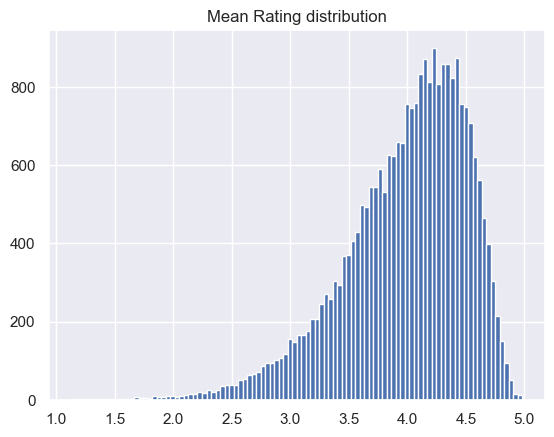

In [27]:
#plot the rating distribution of average rating product
plt.hist(mean_rating_product_count['rating'],bins=100)
plt.title('Mean Rating distribution')
plt.show()

In [28]:
#check the skewness of the mean rating data
mean_rating_product_count['rating'].skew()

-0.9512537061128555

In [37]:
#it is highly negative skewed

In [29]:
mean_rating_product_count['rating_counts'] = pd.DataFrame(data.groupby('productId')['rating'].count())

In [30]:
mean_rating_product_count.head()

,rating,rating_counts
productId,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171


In [31]:
#highest mean rating product
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].max()]

,rating,rating_counts
productId,,
B0074BW614,4.491504,18244


In [32]:
#min mean rating product
print('min average rating product : ',mean_rating_product_count['rating_counts'].min())
print('total min average rating products : ',mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].min()].shape[0])

min average rating product :  50
total min average rating products :  468


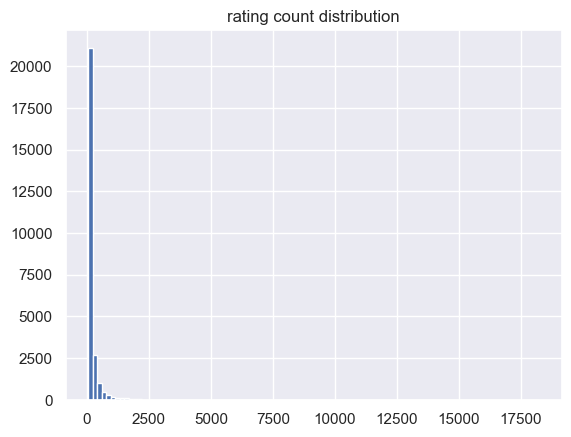

In [33]:
#plot the rating count of mean_rating_product_count
plt.hist(mean_rating_product_count['rating_counts'],bins=100)
plt.title('rating count distribution')
plt.show()

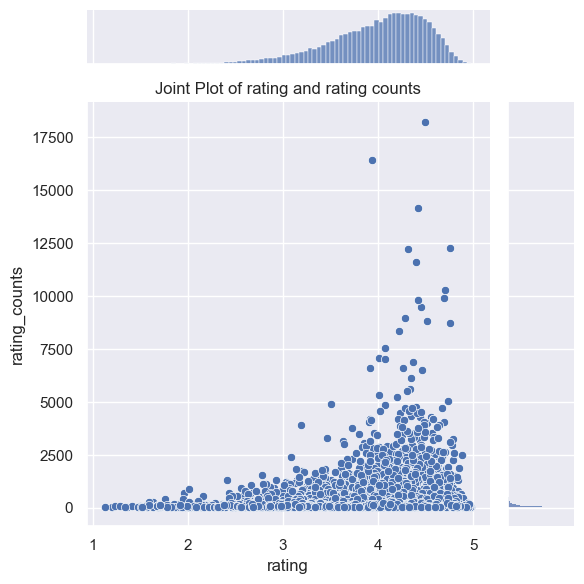

In [34]:
#joint plot of rating and rating counts
sns.jointplot(x='rating',y='rating_counts',data=mean_rating_product_count)
plt.title('Joint Plot of rating and rating counts')
plt.tight_layout()
plt.show()

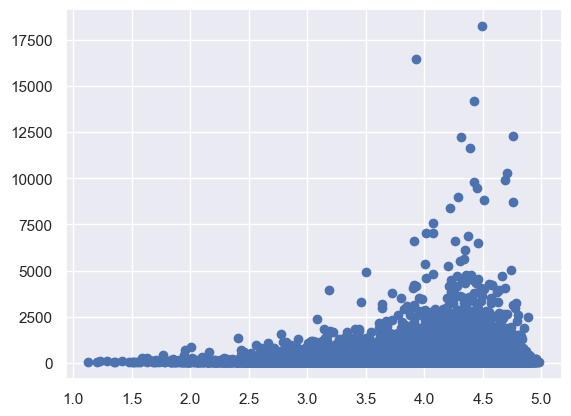

In [35]:
plt.scatter(x=mean_rating_product_count['rating'],y=mean_rating_product_count['rating_counts'])
plt.show()

In [36]:
print('Correlation between Rating and Rating Counts is : {} '.format(mean_rating_product_count['rating'].corr(mean_rating_product_count['rating_counts'])))

Correlation between Rating and Rating Counts is : 0.07358807628426928 


**Collaberative filtering (Item-Item recommedation)**

Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.

In [37]:
#import surprise library for collebrative filtering
#check_and_install_library('scikit-surprise')

In [38]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [39]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(data,reader)

In [40]:
#Splitting surprise the dataset into 80,20 ratio using train_test_split
trainset, testset = train_test_split(surprise_data, test_size=0.3,random_state=42)

In [41]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
#make prediction using testset
test_pred=algo.test(testset)

In [ ]:
#print RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred ,verbose=True)

Item-based Model : Test Set
RMSE: 1.3076


1.3076243042808304

**Model-based collaborative filtering system**

These methods are based on machine learning and data mining techniques. The goal is to train models to be able to make predictions. For example, we could use existing user-item interactions to train a model to predict the top-5 items that a user might like the most. One advantage of these methods is that they are able to recommend a larger number of items to a larger number of users, compared to other methods like memory based approach. They have large coverage, even when working with large sparse matrices.

In [ ]:
data2=data.sample(20000)
ratings_matrix = data2.pivot_table(values='rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,1400532655,140053271X,B00000DM9W,B00000J1V5,B00000JI4F,B00000K135,B00000K2YR,B00001OWYM,B00001P4XA,...,B00I2VIR2M,B00I2ZBD1U,B00I94IPTW,B00I9K3ZQ4,B00IDG3IDO,B00IF70QCW,B00INNP5VU,B00IO1V33U,B00ISGCAJM,B00IVPU786
userId,,,,,,,,,,,,,,,,,,,,,
A00177463W0XWB16A9O05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01226232SWR9CRXVU4MY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0243085HOOFEHX1ABJF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A02453511MLO2A636SEU9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A02706522XN7C2M9GMHPY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


above we have created a pivot table of the rating where the value of the column will rating and index will be userId and the column name will be productId

In [ ]:
#check the shape of the rating_matrix
ratings_matrix.shape

(19898, 4370)

In [ ]:
#transpose the metrix to make column (productId) as index and index as column (userId)
x_ratings_matrix=ratings_matrix.T
x_ratings_matrix.head()

userId,A00177463W0XWB16A9O05,A01226232SWR9CRXVU4MY,A0243085HOOFEHX1ABJF,A02453511MLO2A636SEU9,A02706522XN7C2M9GMHPY,A029890629O30UETJ6W91,A03301153EBVJDKSCH85G,A03605631ICATFHK20PJ1,A03670271E4DKHD4RU1OY,A03970901SJICBXATTVT7,...,AZX0W2PEZ2Y9A,AZXD1K34BB4N,AZXJJM4F1SY3,AZXOVQHU9901G,AZY4E1MC6QPSM,AZYBCXJ2MVWL1,AZYBZEVISD0YX,AZZ8COE8COY71,AZZIFAMCVA0YJ,AZZPA8G4TZBJB
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400532655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140053271X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000DM9W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000J1V5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_ratings_matrix.shape

(4370, 19898)

In [ ]:
#Decomposition of the matrix using Singular Value Decomposition technique
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x_ratings_matrix)
decomposed_matrix.shape

(4370, 10)

In [ ]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(4370, 4370)

In [ ]:
x_ratings_matrix.index[10]

'B00001P4XH'

In [ ]:
i="B00001P4ZH"
product_names=list(x_ratings_matrix.index)
product_id=product_names.index(i)
print(product_id)

11


Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [ ]:
correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(4370,)

In [ ]:
correlation_matrix[correlation_product_ID>0.75].shape

(282, 4370)

In [ ]:
#Recommending top 20 highly correlated products in sequence
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.75])
recommend[:20]

['B00001P4ZH',
 'B00001P4ZR',
 'B00004Z5M1',
 'B000051ZOA',
 'B00005N6KG',
 'B00005T380',
 'B00005T3C8',
 'B000067O5G',
 'B00006I5SQ',
 'B00006JQ06',
 'B000093UDQ',
 'B0000BZOGJ',
 'B0001H27PS',
 'B0002D03ZW',
 'B0002J28NQ',
 'B0002RBQO0',
 'B0002U1TJY',
 'B0002WTK48',
 'B0002ZW5W4',
 'B00030097G']